# Prepared by ABABA LATA GUTA

# Child Health and Mortality Prevention Surveillance (CHAMPS)

In this data challenge, Child Health and Mortality Prevention Surveillance (CHAMPS) dataset has been provided to the interns. The purpose of the CHAMPS Surveillance dataset was to collect, analyze, and share data to help identify the causes of child deaths in areas with high child mortality. For the child mortality dataset, there are underlying cause of death from the infant side and also maternal factors contributing to this death. For ease of understanding, variable names and their possible values have been decoded in table 1 below

# Libraries Used

* Random: Python modeule for generating random numbers.
    
* Pandas (pd):Data manipulation and analysis library.
    
* numpy (np) : Library for numerical operations on arrays and metrices

* Matplotlib.pyplot as plt : Visualization library for creating static, animated, and interace.
    
* seaborn (sns): Data Visualization library based on matplotlib that provides a high-level interface
    
* scipy.stats.outliers_influence.variance_infelation_factor: VIF predictor
    
* statsmodels.tools.tools.add_constant: Function to add a constant term to the predictor.

* sklearn.model_selection.GridSearchCV: Grid search with cross-validation.
    
* sklearn.metrics: Evaluation metrics for machine learning models.
    
* sklearn.linear_model import LogisticRegression 

* sklearn.ensemble import AdaBoostClassifier: AdaBoostClassifier

* sklearn.ensemble import RandomForestClassifier: RandomForestClassifier

* sklearn.ensemble import GradientBoostingClassifier:GradientBoostingClassifier 

* xgboost import XGBClassifier 

    


# Code Explanation

* The code begins by setting up the necessary libraries and configuring warming filters to ignore them during execution. it then proceeds with data analysis and machine learning model training.


* Note: Ensure that the required datasets are loaded before running this code cell.


# The Mentioned classification models with more detailed parameter tuning used are given below:

* Logistic Regression:-

     * C: Regularization parameter
     
     * penalty: Regularization type ('l1' or 'l2')

     * solver: Optimization algorithm to use

* Support Vector Machine (SVM):

     * C: Regularization parameter

     * kernel: Kernel type ('linear', 'rbf', 'poly', 'sigmoid')
     
     * gamma: Kernel coefficient
 
* AdaBoost Classifier:
    
     * n_estimators: Number of weak learners

     * learning_rate: Learning rate

* Random Forest Classifier:
    
     * n_estimators: Number of trees

     * max_depth: Maximum depth of the trees

     * min_samples_split: Minimum number of samples required to split a node

* Gradient Boosting Classifier:

     * n_estimators: Number of boosting stages

     * max_depth: Maximum depth of the individual regression estimators

     * learning_rate: Learning rate

* XGBoost Classifier:

     * n_estimators: Number of boosting rounds

     * max_depth: Maximum depth of the trees

     * learning_rate: Learning rate

* For each model, we use a GridSearchCV to perform a hyperparameter search to find the best combination of parameters. The test accuracy for each model is printed.

# Import Important Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,matthews_corrcoef,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
df = pd.read_csv('CHAMPS.csv')
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,None,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",None,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


# Custom Scorer Function 

The following code defines a custom scoring function named custom_scorer. This function is designed to handle potential exceptions that may occur during the calculation of a specified scoring metric

# MCC

* The Matthews Correlation Coefficient (MCC) is a metric used for evaluating the performance of binary and multiclass classification models. It takes into account true positive (TP), true negative(TN), false positive (FP), and false negative (FN) values and produces a score between -1 and +1 

In [3]:
def custom_scorer(y_true, y_pred, actual_scorer):
    score=np.nan
    try: score=actual_score(y_true,y_pred)
    except Exception:pass
    return score
mcc=make_scorer(custom_scorer,actual_scorer=matthews_corrcoef)

# EDA

Now we can load the datset and do the exploratory data analysis

In [4]:
import pandas as pd
df = pd.read_csv('CHAMPS.csv',engine="python")
#df=df.dropna()
df.head(3)

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,None,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",None,2


# Check number of columns and rows

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 444 rows and 381 columns.


# Enumerate the columns of the dataset:

In [6]:
df.columns

Index(['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002',
       'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007',
       ...
       'dpf_012___ch00040', 'dpf_012___ch00041', 'dpf_012___ch00042',
       'dpf_012___ch00043', 'dpf_012___ch01424', 'dpf_012___ch01875',
       'dpf_012___ch00010', 'dpf_013', 'dpf_014',
       'crf_060302_decode_panel_feedback_form_complete'],
      dtype='object', length=381)

# Rename Columns

In [7]:
df = df.rename(columns={'dp_013': 'case_type', 'dp_108': 'underlying_cause', 'dp_118': 'maternal_factor'})

In [8]:
df.columns

Index(['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002',
       'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007',
       ...
       'dpf_012___ch00040', 'dpf_012___ch00041', 'dpf_012___ch00042',
       'dpf_012___ch00043', 'dpf_012___ch01424', 'dpf_012___ch01875',
       'dpf_012___ch00010', 'dpf_013', 'dpf_014',
       'crf_060302_decode_panel_feedback_form_complete'],
      dtype='object', length=381)

# Rename the values in the 'case_type' column:

In [9]:
df['case_type'] = df['case_type'].replace({'CH00716': 'Stillbirth', 
                                           'CH01404': 'Death in the first 24 hours',
                                           'CH01405': 'Early Neonate (1 to 6 days)', 
                                           'CH01406': 'Late Neonate (7 to 27 days)',
                                           'CH00718': 'Infant (28 days to less than 12 months)',
                                           'CH00719': 'Child (12 months to less than 60 months)'})

In [10]:
data=df[['champs_id','case_type','underlying_cause', 'maternal_factor']]
data.head()

,champs_id,case_type,underlying_cause,maternal_factor
0,ETAA00002,Stillbirth,Undetermined,Undetermined
1,ETAA00004,Stillbirth,Undetermined,Undetermined
2,ETAA00005,Stillbirth,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
3,ETAA00008,Child (12 months to less than 60 months),Severe acute malnutrition - Kwashiorkor,NaN
4,ETAA00009,Late Neonate (7 to 27 days),Sepsis,NaN


# show the proportion of null values in each column:

In [12]:
print(data.isnull().mean())

champs_id           0.000000
case_type           0.000000
underlying_cause    0.000000
maternal_factor     0.556306
dtype: float64


In [14]:
data=data.dropna()

In [15]:
data.head()

,champs_id,case_type,underlying_cause,maternal_factor
0,ETAA00002,Stillbirth,Undetermined,Undetermined
1,ETAA00004,Stillbirth,Undetermined,Undetermined
2,ETAA00005,Stillbirth,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
7,ETAA00017,Stillbirth,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
8,ETAA00018,Stillbirth,Intrauterine hypoxia,Uterine rupture


# 2. Descriptive Data Analysis:-

* A. Magnitude and proportion of each infant underlying cause for child death:

In [17]:
# Magnitude and proportion of each infant underlying cause for child death:")
print(data['underlying_cause'].value_counts(normalize=True))

Intrauterine hypoxia                        0.497462
Birth asphyxia                              0.086294
Respiratory distress syndrome               0.065990
Intrauterine growth restriction             0.040609
Low birth weight                            0.030457
Preterm infant                              0.025381
Preterm baby                                0.025381
Sepsis                                      0.025381
Undetermined                                0.020305
Hyaline membrane disease                    0.020305
Intrauterine hypoxia                        0.015228
Intrauterine growth restriction             0.010152
Meconium aspiration syndrome                0.010152
Intrauterine infection                      0.010152
Bacterial sepsis of newborn                 0.010152
Preterm                                     0.010152
Intrauterine Hyopxia                        0.005076
intrauterine hypoxia                        0.005076
 Preterm baby                               0.

* B. Proportion and magnitude of maternal factors contributing to child death:

In [19]:
print("Proportion and magnitude of the maternal factors contributing to child death:")
print(df['maternal_factor'].value_counts(normalize=True))

Proportion and magnitude of the maternal factors contributing to child death:
Preeclampsia                                                                                             0.182741
Twin pregnancy                                                                                           0.060914
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)    0.055838
Eclampsia                                                                                                0.045685
Fetus and newborn affected by other forms of placental separation and hemorrhage                         0.025381
                                                                                                           ...   
Fetus and newborn affected by oligohydramnios                                                            0.005076
Fetus and newborn affected by maternal diabetes                                                          0.005076
Fetus and 

* C.Proportion of the child death by the case type

In [21]:
print("Proportion of the child death by the case type:")
print(df['case_type'].value_counts(normalize=True))

Proportion of the child death by the case type:
Stillbirth                                  0.538288
Death in the first 24 hours                 0.155405
Early Neonate (1 to 6 days)                 0.110360
Child (12 months to less than 60 months)    0.094595
Infant (28 days to less than 12 months)     0.060811
Late Neonate (7 to 27 days)                 0.040541
Name: case_type, dtype: float64


# 3.Correlation Analysis

* Before we analysis correlation we need to encode some variables in the given data

In [23]:
# Create the new features
data['intrauterine_hypoxia'] = (data['underlying_cause'] == 'Intrauterine hypoxia').astype(int)
data['birth_asphyxia'] = (data['underlying_cause'] == 'Birth asphyxia').astype(int)
data['undetermined'] = (data['underlying_cause'] == 'Undetermined').astype(int)
data['severe_acute_malnutrition'] = (data['underlying_cause'] == 'Severe acute malnutrition').astype(int)
data['craniorachischisis'] = (data['underlying_cause'] == 'Craniorachischisis').astype(int)

data['preeclampsia'] = (data['maternal_factor'] == 'Preeclampsia').astype(int)
data['twin_pregnancy'] = (data['maternal_factor'] == 'Twin pregnancy').astype(int)
data['abruption_placenta'] = (data['maternal_factor'] == 'Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)').astype(int)
data['eclampsia'] = (data['maternal_factor'] == 'Eclampsia').astype(int)
data['placental_issues'] = (data['maternal_factor'] == 'Placental issues').astype(int)

In [25]:
# Assuming your data is in a DataFrame called 'df'
data['child_death'] = 0
data.loc[data['case_type'].isin(['Stillbirth', 'Death_in_first_24_hours', 'Early_Neonate_1_to_6_days', 
                            'Child_12_months_to_less_than_60_months', 'Infant_28_days_to_less_than_12_months', 
                            'Late_Neonate_7_to_27_days']), 'child_death'] = 1

In [29]:
data.head()

,champs_id,case_type,underlying_cause,maternal_factor,intrauterine_hypoxia,birth_asphyxia,undetermined,severe_acute_malnutrition,craniorachischisis,preeclampsia,twin_pregnancy,abruption_placenta,eclampsia,placental_issues,child_death
0,ETAA00002,Stillbirth,Undetermined,Undetermined,0,0,1,0,0,0,0,0,0,0,1
1,ETAA00004,Stillbirth,Undetermined,Undetermined,0,0,1,0,0,0,0,0,0,0,1
2,ETAA00005,Stillbirth,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,1,0,0,0,0,0,0,0,0,0,1
7,ETAA00017,Stillbirth,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,1,0,0,0,0,0,0,0,0,0,1
8,ETAA00018,Stillbirth,Intrauterine hypoxia,Uterine rupture,1,0,0,0,0,0,0,0,0,0,1


In [35]:
mydata=data[["intrauterine_hypoxia","birth_asphyxia","undetermined",
             "preeclampsia","twin_pregnancy","abruption_placenta",
             "child_death"]]
mydata.head()

,intrauterine_hypoxia,birth_asphyxia,undetermined,preeclampsia,twin_pregnancy,abruption_placenta,child_death
0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,1
7,1,0,0,0,0,0,1
8,1,0,0,0,0,0,1


In [36]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 440
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   intrauterine_hypoxia  197 non-null    int64
 1   birth_asphyxia        197 non-null    int64
 2   undetermined          197 non-null    int64
 3   preeclampsia          197 non-null    int64
 4   twin_pregnancy        197 non-null    int64
 5   abruption_placenta    197 non-null    int64
 6   child_death           197 non-null    int64
dtypes: int64(7)
memory usage: 12.3 KB


In [37]:
mydata.corr()

,intrauterine_hypoxia,birth_asphyxia,undetermined,preeclampsia,twin_pregnancy,abruption_placenta,child_death
intrauterine_hypoxia,1.000000,-0.305762,-0.143234,0.081212,-0.126052,0.155992,0.600808
birth_asphyxia,-0.305762,1.000000,-0.044242,-0.004986,-0.078270,-0.074736,-0.387770
undetermined,-0.143234,-0.044242,1.000000,-0.068075,-0.036665,0.121739,0.114095
preeclampsia,0.081212,-0.004986,-0.068075,1.000000,-0.120432,-0.114995,0.104922
twin_pregnancy,-0.126052,-0.078270,-0.036665,-0.120432,1.000000,-0.061936,-0.146958
abruption_placenta,0.155992,-0.074736,0.121739,-0.114995,-0.061936,1.000000,0.101899
child_death,0.600808,-0.387770,0.114095,0.104922,-0.146958,0.101899,1.000000


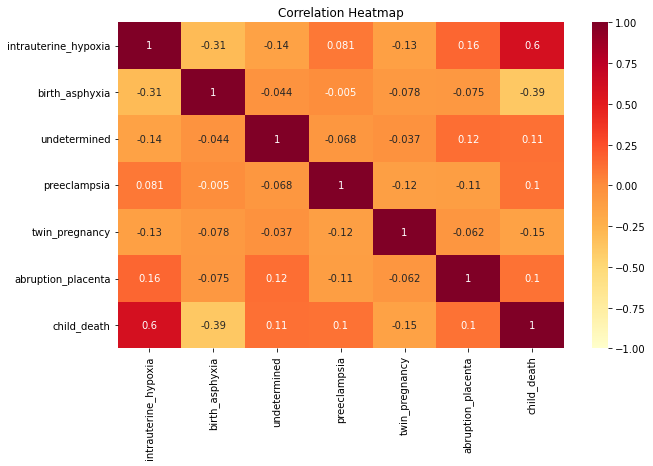

In [38]:
corr_matrix = mydata.corr()

# Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [39]:
mydata.select_dtypes(exclude=['category']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
intrauterine_hypoxia,197.0,0.497462,0.501267,0.0,0.0,0.0,1.0,1.0
birth_asphyxia,197.0,0.086294,0.281514,0.0,0.0,0.0,0.0,1.0
undetermined,197.0,0.020305,0.141399,0.0,0.0,0.0,0.0,1.0
preeclampsia,197.0,0.182741,0.387439,0.0,0.0,0.0,0.0,1.0
twin_pregnancy,197.0,0.060914,0.239781,0.0,0.0,0.0,0.0,1.0
abruption_placenta,197.0,0.055838,0.230193,0.0,0.0,0.0,0.0,1.0
child_death,197.0,0.614213,0.488021,0.0,0.0,1.0,1.0,1.0


In [52]:
x=mydata.drop(["child_death"],axis=1)
y=mydata["child_death"]

In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression

In [54]:
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_clf = LogisticRegression()
lr_grid = GridSearchCV(lr_clf, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
print("Logistic Regression:", lr_grid.best_score_, lr_grid.best_params_)

Logistic Regression: 0.7836693548387098 {'C': 1, 'penalty': 'l2'}


# Confusion Matrix

<Figure size 576x576 with 0 Axes>

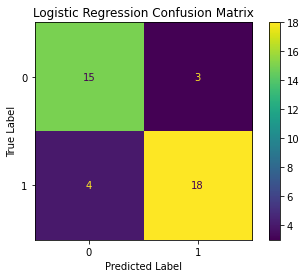

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get the best model from the grid search
best_lr_model = lr_grid.best_estimator_

# Make predictions on the test set
y_pred = best_lr_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_clf = SVC()
svm_grid = GridSearchCV(svm_clf, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
print("Support Vector Machine:", svm_grid.best_score_, svm_grid.best_params_)

Support Vector Machine: 0.7965725806451613 {'C': 0.1, 'kernel': 'rbf'}


<Figure size 576x576 with 0 Axes>

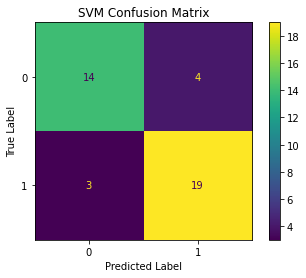

In [62]:
# Get the best SVM model
best_svm_model = svm_grid.best_estimator_

# Make predictions on the test set
y_pred_sv = best_svm_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_sv)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AdaBoost Classifier

In [65]:
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]}
ada_clf = AdaBoostClassifier()
ada_grid = GridSearchCV(ada_clf, ada_params, cv=5)
ada_grid.fit(X_train, y_train)
print("AdaBoost Classifier:", ada_grid.best_score_, ada_grid.best_params_)

AdaBoost Classifier: 0.7959677419354839 {'learning_rate': 0.01, 'n_estimators': 150}


<Figure size 576x576 with 0 Axes>

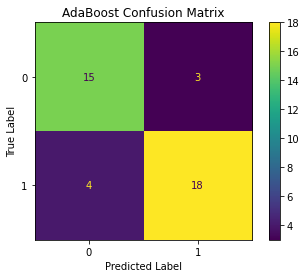

In [66]:
# Get the best AdaBoost model
best_ada_model = ada_grid.best_estimator_

# Make predictions on the test set
y_pred_ada = best_ada_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classifier

In [67]:
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}
rf_clf = RandomForestClassifier()
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print("Random Forest Classifier:", rf_grid.best_score_, rf_grid.best_params_)


Random Forest Classifier: 0.7965725806451613 {'max_depth': 10, 'n_estimators': 100}


<Figure size 576x576 with 0 Axes>

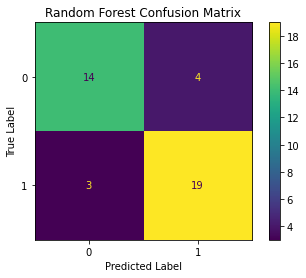

In [68]:
# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [70]:
# Gradient Boosting Classifier
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01,0.001]}
gb_clf = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb_clf, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
print("Gradient Boosting Classifier:", gb_grid.best_score_, gb_grid.best_params_)

Gradient Boosting Classifier: 0.7836693548387098 {'learning_rate': 0.1, 'n_estimators': 100}


<Figure size 576x576 with 0 Axes>

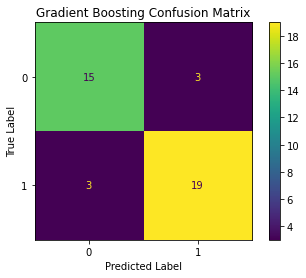

In [75]:
# Get the best Gradient Boosting model
best_gb_model = gb_grid.best_estimator_

# Make predictions on the test set
y_pred_gb = best_gb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
# XGBoost Classifier
xgb_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
xgb_clf = XGBClassifier()
xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
print("XGBoost Classifier:", xgb_grid.best_score_, xgb_grid.best_params_)

XGBoost Classifier: 0.7645161290322581 {'learning_rate': 0.1, 'max_depth': 3}


<Figure size 576x576 with 0 Axes>

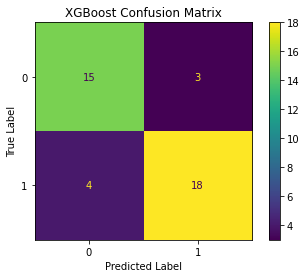

In [77]:
# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# Make predictions on the test set
y_pred_xgb= best_xgb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot()
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.Model evaluation using the proper metrics

## A.Import the appropriate evaluation metric packages

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [82]:
# Logistic Regression
y_pred_lr = lr_grid.best_estimator_.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)

print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"F1-score: {lr_f1:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")

Logistic Regression:
Accuracy: 0.82
F1-score: 0.84
Precision: 0.86
Recall: 0.82


In [87]:
y_pred_svm = svm_grid.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1-score: {svm_f1:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")


Support Vector Machine (SVM):
Accuracy: 0.85
F1-score: 0.86
Precision: 0.86
Recall: 0.86


In [84]:
# Random Forest
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1-score: {rf_f1:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")


Random Forest:
Accuracy: 0.85
F1-score: 0.86
Precision: 0.86
Recall: 0.86


In [85]:
# Gradient Boosting
y_pred_gb = gb_grid.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)

print("\nGradient Boosting:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"F1-score: {gb_f1:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")


Gradient Boosting:
Accuracy: 0.85
F1-score: 0.86
Precision: 0.86
Recall: 0.86


In [86]:
# XGBoost
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"F1-score: {xgb_f1:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")


XGBoost:
Accuracy: 0.82
F1-score: 0.84
Precision: 0.86
Recall: 0.82


# B. Using the appropriate n-fold cross-validation and out-of-sample data, select the best performing model from the candidate models under 4(A):

In [88]:
# Perform 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)#, random_state=42)

# Evaluate the models using cross-validation
for model, name in zip([lr_grid,svm_grid , ada_grid, rf_grid, xgb_grid], ['Logistic Regression', 'SVM', 'AdaBoost', 'RandomForest','XGBoost']):
    scores = []
    for train_idx, val_idx in skf.split(x, y):
        X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model.fit(X_train, y_train)
        scores.append(model.score(X_val, y_val))
    print(f"{name} 5-Fold CV Accuracy: {np.mean(scores):.3f}")

# Select the best performing model
best_model = max([lr_grid,svm_grid, ada_grid, rf_grid, xgb_grid], key=lambda x: np.mean(scores))
print(f"Best Performing Model: {type(best_model).__name__}")

Logistic Regression 5-Fold CV Accuracy: 0.792
SVM 5-Fold CV Accuracy: 0.808
AdaBoost 5-Fold CV Accuracy: 0.797
RandomForest 5-Fold CV Accuracy: 0.808
XGBoost 5-Fold CV Accuracy: 0.791
Best Performing Model: GridSearchCV


## C. Ensemble the models and see the performance of the combination models on the data:

In [89]:
lr_grid.best_estimator_.probability = True
svm_grid.best_estimator_.probability = True
ada_grid.best_estimator_.probability = True
rf_grid.best_estimator_.probability = True
xgb_grid.best_estimator_.probability = True
gb_grid.best_estimator_.probability = True

In [90]:
# Create the ensemble model
ensemble = VotingClassifier(estimators=[('lr', lr_grid.best_estimator_), ('svm', svm_grid.best_estimator_), 
                                       ('ada', ada_grid.best_estimator_), ('rf', rf_grid.best_estimator_),
                                        ('xgb',xgb_grid.best_estimator_), ('gb',gb_grid.best_estimator_)],
                            voting='soft')
ensemble.fit(X_train, y_train)
ensemble_score = ensemble.score(X_test, y_test)
print(f"Ensemble Model Test Accuracy: {ensemble_score:.3f}")

Ensemble Model Test Accuracy: 0.850


## D.Use Accuracy score metrics to evaluate the performance of the models above 

In [94]:
# Evaluate the performance of the models
y_pred_lr = lr_grid.best_estimator_.predict(X_test)
y_pred_svm = svm_grid.best_estimator_.predict(X_test)
y_pred_ada = ada_grid.best_estimator_.predict(X_test)
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)
y_pred_gb = gb_grid.best_estimator_.predict(X_test)

print("Accuracy Scores:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):.3f}")
print(f"AdaBoost: {accuracy_score(y_test, y_pred_ada):.3f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Xgbost: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"gb:{accuracy_score(y_test, y_pred_gb):.3f}")
print(f"Ensemble: {accuracy_score(y_test, y_pred_ensemble):.3f}")

Accuracy Scores:
Logistic Regression: 0.825
SVM: 0.825
AdaBoost: 0.825
Random Forest: 0.850
Xgbost: 0.825
gb:0.850
Ensemble: 0.850


## E.Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above

In [96]:
# Fit the individual models with probability=True
lr_grid.best_estimator_.probability = True
lr_grid.best_estimator_.fit(X_train, y_train)

svm_grid.best_estimator_.probability = True
svm_grid.best_estimator_.fit(X_train, y_train)

ada_grid.best_estimator_.probability = True
ada_grid.best_estimator_.fit(X_train, y_train)

rf_grid.best_estimator_.probability = True
rf_grid.best_estimator_.fit(X_train, y_train)

xgb_grid.best_estimator_.probability = True
xgb_grid.best_estimator_.fit(X_train, y_train)

gb_grid.best_estimator_.probability = True
gb_grid.best_estimator_.fit(X_train, y_train)

GradientBoostingClassifier()

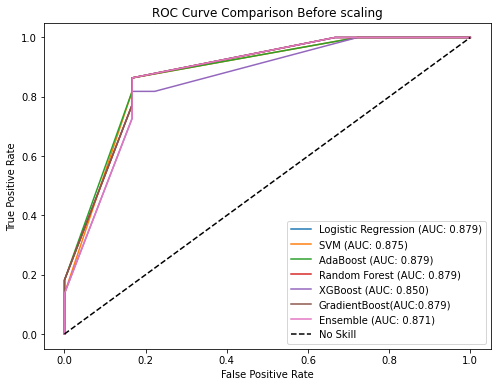

In [97]:
# Calculate the ROC-AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_gb,tpr_gb, _ = roc_curve(y_test, gb_grid.best_estimator_.predict_proba(X_test)[:, 1])
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1])

auc_lr = roc_auc_score(y_test, lr_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_svm = roc_auc_score(y_test, svm_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_ada = roc_auc_score(y_test, ada_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_gb=roc_auc_score(y_test, gb_grid.best_estimator_.predict_proba(X_test)[:, 1])
auc_ensemble = roc_auc_score(y_test, ensemble.predict_proba(X_test)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC: {auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC: {auc_svm:.3f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC: {auc_ada:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC: {auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC: {auc_xgb:.3f})')
plt.plot(fpr_gb,tpr_gb,label=f'GradientBoost(AUC:{auc_gb:.3f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC: {auc_ensemble:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Before scaling')
plt.legend()
plt.show()

# 6.Result Visualization: Import the appropriate visualization package and: 

## A.Plot the feature importance in descending order for each of the models using horizontal bar chart

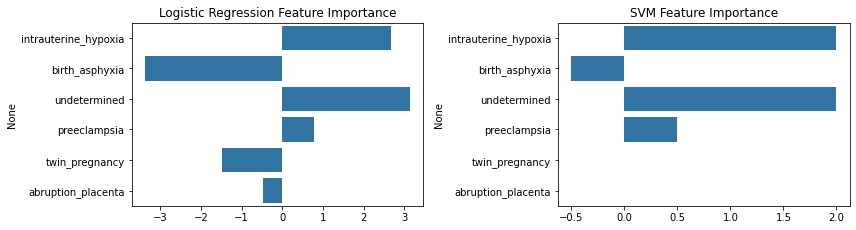

In [121]:
# Plot the feature importances for the best estimator in each GridSearchCV object
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=lr_grid.best_estimator_.coef_[0], y=x.columns, orient='h')
plt.title('Logistic Regression Feature Importance')

plt.subplot(2, 2, 2)
sns.barplot(x=svm_grid.best_estimator_.coef_[0], y=x.columns, orient='h')
plt.title('SVM Feature Importance')

plt.tight_layout()

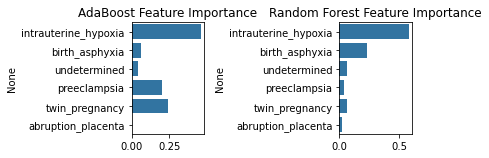

In [120]:
plt.subplot(2, 2, 1)
sns.barplot(x=ada_grid.best_estimator_.feature_importances_, y=x.columns, orient='h')
plt.title('AdaBoost Feature Importance')

plt.subplot(2, 2, 2)
sns.barplot(x=rf_grid.best_estimator_.feature_importances_, y=x.columns, orient='h')
plt.title('Random Forest Feature Importance')

plt.tight_layout()

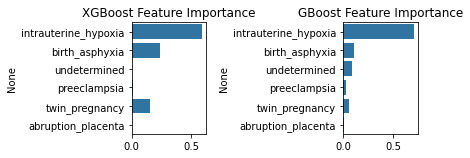

In [119]:
#plt.figure(figsize=(4,3))
plt.subplot(2, 2, 1)
sns.barplot(x=xgb_grid.best_estimator_.feature_importances_, y=x.columns, orient='h')
plt.title('XGBoost Feature Importance')

plt.subplot(2, 2, 2)
sns.barplot(x=gb_grid.best_estimator_.feature_importances_, y=x.columns, orient='h')
plt.title('GBoost Feature Importance')

plt.tight_layout()

## B.Plot the top five Underlying cause contributing to the child death

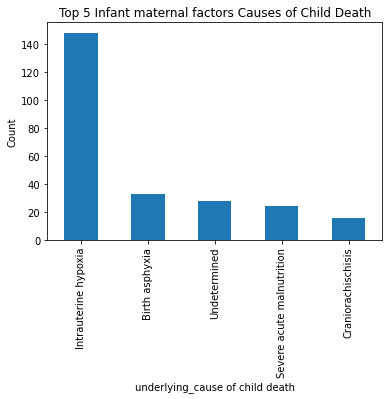

In [128]:
top_5_underlying = df['underlying_cause'].value_counts().head(5)
top_5_underlying.plot(kind='bar')
plt.title('Top 5 Infant maternal factors Causes of Child Death')
plt.xlabel('underlying_cause of child death')
plt.ylabel('Count')
plt.show()

## C.Plot the top five Maternal factor contributing to the child death

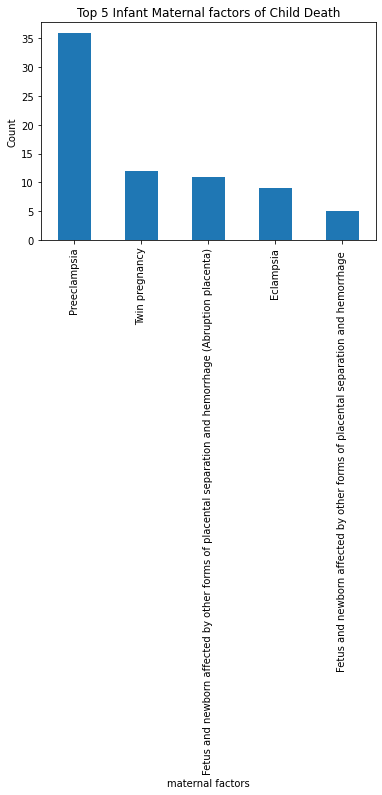

In [129]:
top_5_underlying = df['maternal_factor'].value_counts().head(5)
top_5_underlying.plot(kind='bar')
plt.title('Top 5 Infant Maternal factors of Child Death')
plt.xlabel('maternal factors')
plt.ylabel('Count')
plt.show()

## D.Plot the child death based on the case types

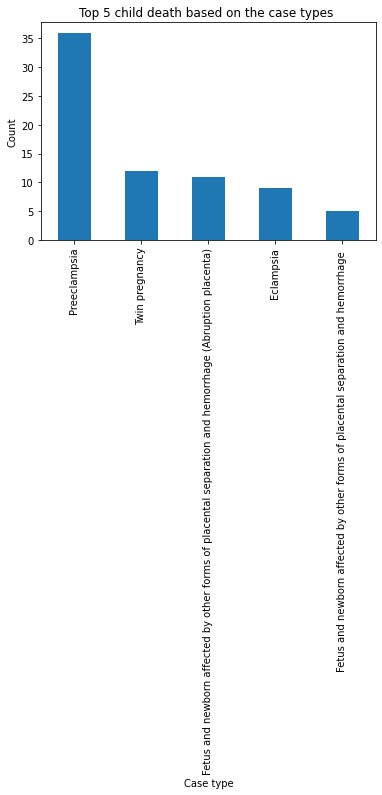

In [130]:
top_5_case_types = df['case_type'].value_counts().head(5)
top_5_underlying.plot(kind='bar')
plt.title('Top 5 child death based on the case types ')
plt.xlabel('Case type')
plt.ylabel('Count')
plt.show()